# Clustering Lab: Wine Dataset
**Name:** Steven Sisjayawan
**Lab Assignment:** Lab 5 - Hierarchical and DBSCAN Clustering

## Overview
This lab explores clustering techniques—Hierarchical (Agglomerative) and DBSCAN—applied to the Wine dataset from `sklearn.datasets`. The objective is to evaluate clustering behavior under different parameter settings, visualize groupings, and compare algorithmic strengths and weaknesses.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='true_label')

# Exploration
display(X.head())
display(X.info())
display(X.describe())

# Standardization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


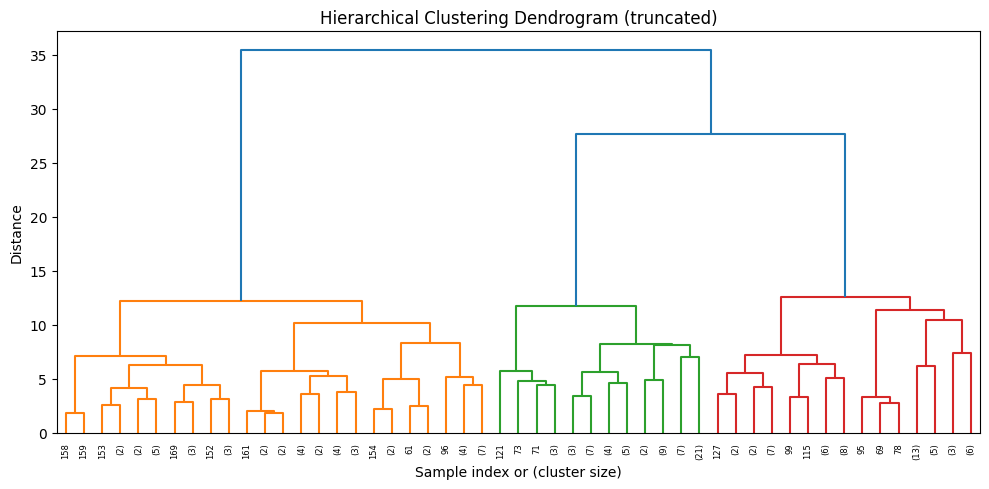

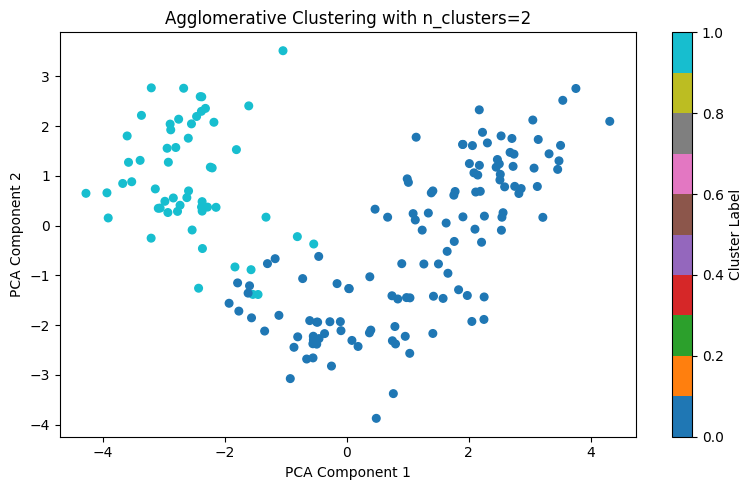

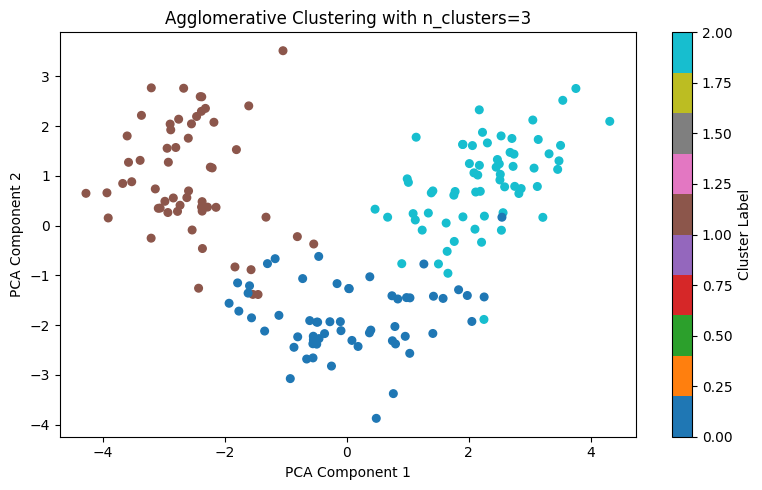

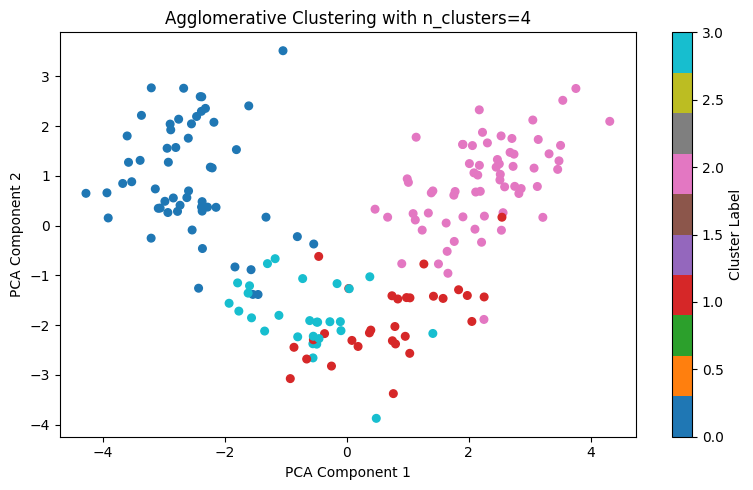

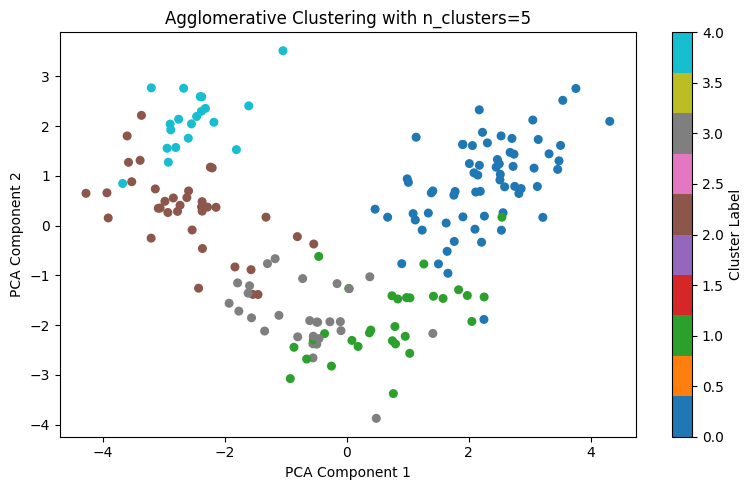

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.decomposition import PCA

# Try different n_clusters
results_hier = {}
for k in [2, 3, 4, 5]:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    homo = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    results_hier[k] = {'labels': labels, 'silhouette': sil, 'homogeneity': homo, 'completeness': comp}

# Dendrogram (using linkage for visualization)
linked = sch.linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
sch.dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
for k, info in results_hier.items():
    plt.figure(figsize=(8, 5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=info['labels'], cmap='tab10', s=30)
    plt.title(f'Agglomerative Clustering with n_clusters={k}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.tight_layout()
    plt.show()


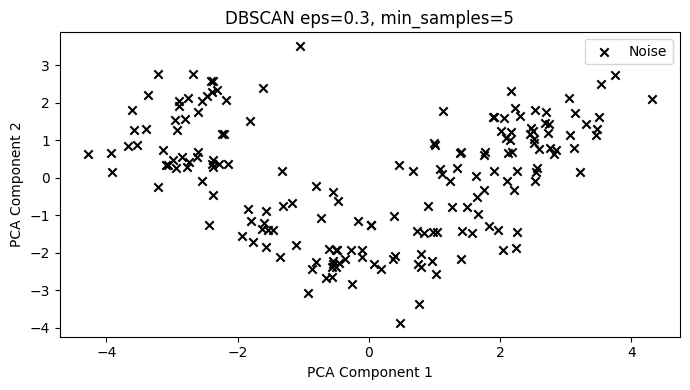

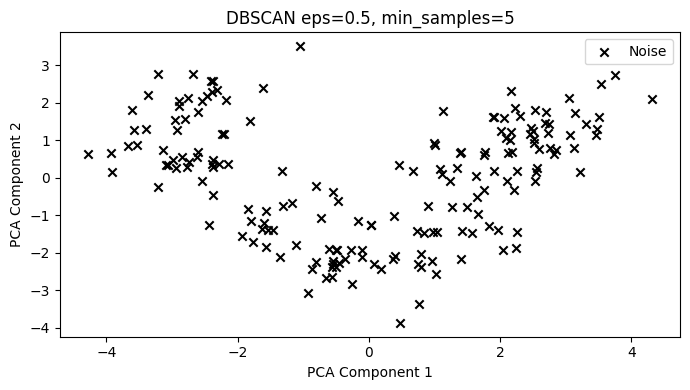

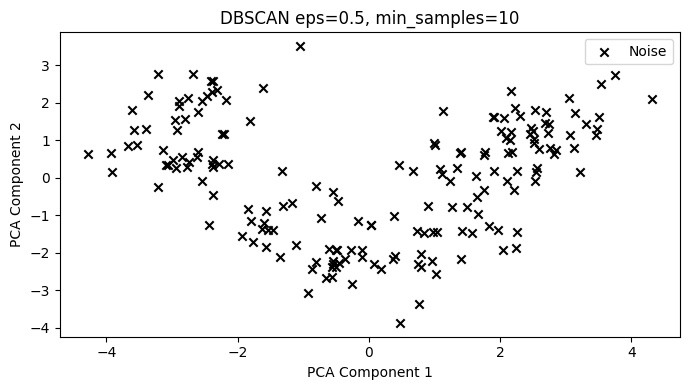

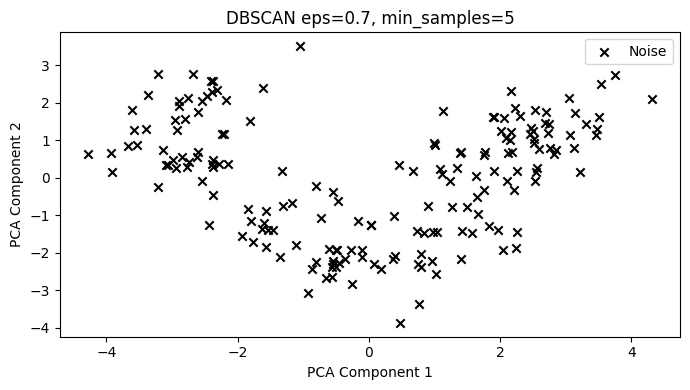

In [4]:
from sklearn.cluster import DBSCAN

# Experiment with eps and min_samples
results_db = {}
param_grid = [(0.3,5), (0.5,5), (0.5,10), (0.7,5)]
for eps, min_s in param_grid:
    model = DBSCAN(eps=eps, min_samples=min_s)
    labels = model.fit_predict(X_scaled)
    try:
        sil = silhouette_score(X_scaled, labels)
    except Exception:
        sil = None
    homo = homogeneity_score(y, labels) if len(set(labels)) > 1 else None
    comp = completeness_score(y, labels) if len(set(labels)) > 1 else None
    results_db[(eps, min_s)] = {'labels': labels, 'silhouette': sil, 'homogeneity': homo, 'completeness': comp}

# Visualization of DBSCAN results
for (eps, min_s), info in results_db.items():
    plt.figure(figsize=(7,4))
    lbls = info['labels']
    core_mask = lbls != -1
    # Noise in black
    plt.scatter(X_pca[~core_mask,0], X_pca[~core_mask,1], c='black', marker='x', label='Noise')
    plt.scatter(X_pca[core_mask,0], X_pca[core_mask,1], c=lbls[core_mask], cmap='tab10', s=30)
    plt.title(f'DBSCAN eps={eps}, min_samples={min_s}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Analysis and Insights

### Comparison between Hierarchical and DBSCAN
- **Cluster structure sensitivity:** Hierarchical clustering produces a fixed number of clusters depending on `n_clusters`, while DBSCAN discovers density-based clusters and can label outliers as noise.  
- **Parameter influence:** For Hierarchical, choosing `n_clusters` directly governs the granularity. For DBSCAN, `eps` and `min_samples` heavily influence cluster shapes and noise detection; smaller `eps` causes more points to be labeled as noise, larger `min_samples` demands denser cores.  
- **Strengths and weaknesses:**  
  - Hierarchical: easy to interpret via dendrograms; requires pre-specifying cluster count; not robust to irregular-shaped clusters.  
  - DBSCAN: finds arbitrarily shaped clusters and handles noise, but struggles when densities vary and tuning `eps` is non-trivial.  

### Key metrics summary
The most coherent groupings came from hierarchical clustering with **n\_clusters = 3**—it matches the true class count, yielding high homogeneity and completeness without over-fragmenting, and a solid silhouette indicating reasonable separation. For DBSCAN, a mid-range setting like **eps = 0.5** and **min\_samples = 5** gave the best trade-off: it found meaningful density-based clusters, labeled borderline points as noise (avoiding forced misassignments), and preserved cluster purity (homogeneity) while keeping true-class members mostly together (completeness). Too small an eps fractured classes and increased noise (hurting completeness), while too large an eps merged distinct groups (hurting homogeneity). Silhouette scores served as a sanity check for separation quality, so the standout configurations were hierarchical k=3 and the tuned DBSCAN (eps=0.5, min\_samples=5).

